In [8]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import requests
from requests.adapters import HTTPAdapter, Retry
import os
import glob
import re
import warnings
warnings.simplefilter("ignore")



print('done')

done


In [9]:

#This is dictionarys of API links for all the databases used in this analysis. Can be updated to include any new analyses.

Nuclear_APIs_dict = {'chromosome':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28GO%3A0000785%29%29&size=500', 
                     'nuclear envelope':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28GO%3A0005635%29%29&size=500', 
                     'nuclear lumen':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0031981%29%29&size=500',
                     'nucleolus':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005730%29%29&size=500', 
                     'nucleoplasm':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005654%29%29&size=500',
                     'nucleus':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005634%29%29&size=500'
                    }

Cytoplasm_APIs_dict = {'actin cytoskeleton':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0015629%29%29&size=500',
                       'aggresome':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0016235%29%29&size=500',
                       'centrosome':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005813%29%29&size=500',
                       'cleavage furrow':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0032154%29%29&size=500',
                       'cytoplasm':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005737%29%29&size=500',
                       'cytoplasmic ribonucleoprotein granule': 'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0036464%29%29&size=500',
                       'cytoskeleton':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005856%29%29&size=500',
                       'cytosol':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005829%29%29&size=500',
                       'flemming body':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0090543%29%29&size=500',
                       'focal adhesion':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005925%29%29&size=500',
                       'intercellular bridge':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0045171%29%29&size=500',
                       'intermediate filament cytoskeleton':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0045111%29%29&size=500',
                       'microtubule cytoskeleton':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0015630%29%29&size=500',
                       'microtubule end':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A1990752%29%29&size=500',
                       'midbody':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0030496%29%29&size=500',
                       'mitochondrion':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005739%29%29&size=500',
                       'mitotic spindle':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0072686%29%29&size=500',
                      }
                      
Endomembrane_APIs_dict = {'clathrin-coated pit':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005905%29%29&size=500',
                         'endomembrane system':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0012505%29%29&size=500',
                         'endoplasmic reticulum':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005783%29%29&size=500',
                         'endosome':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005768%29%29&size=500',
                         'golgi apparatus':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005794%29%29&size=500',
                         'lipid droplet':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005811%29%29&size=500',
                         'lysosome':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005764%29%29&size=500',
                         'omegasome':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A1990462%29%29&size=500',
                         'peroxisome':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005777%29%29&size=500',
                         'retromer complex':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0030904%29%29&size=500',
                         'secretory granule':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0030141%29%29&size=500',
                         'spine apparatus':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0097444%29%29&size=500',
                         'transport vesicle':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0030133%29%29&size=500'
                         }

Extracellular_APIs_dict = {'extracellular organelle':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28GO%3A0043230%29%29&size=500',
                          'extracellular vesicle':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28GO%3A1903561%29%29&size=500',
                          'extracellular space':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28GO%3A0005615%29%29&size=500',
                          'extracellular region':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28GO%3A0005576%29%29&size=500',
                          'exosome':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c%2Ckeyword&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28go%3A0070062%29%20AND%20%28reviewed%3Atrue%29%29%20AND%20%28model_organism%3A9606%29%20AND%20%28reviewed%3Atrue%29&size=500'
                          }

Membrane_APIs_dict = {'membrane':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0016020%29%29&size=500',
                     'extrinsic component of membrane':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0019898%29%29&size=500',
                     'respirasome':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0070469%29%29&size=500',
                     'organelle membrane':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0031090%29%29&size=500',
                     'plasma membrane':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005886%29%29&size=500',
                     'side of membrane':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0098552%29%29&size=500',
                     'annulate lamellae':'https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgo%2Cgo_c&format=tsv&query=%28%28organism_id%3A9606%29%20AND%20%28reviewed%3Atrue%29%20AND%20%28go%3A0005642%29%29&size=500'
                     }
print('done')

done


In [10]:
def read_excel_files(directory):
    files = os.listdir(directory)
    excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]

    # Read each Excel file as an individual dataframe
    individual_dfs = {}
    for file in excel_files:
        df = pd.read_excel(os.path.join(directory, file))
        individual_dfs[file] = df

    # Combine all individual dataframes
    combined_df = pd.concat(individual_dfs.values(), join='inner', ignore_index=True)
    
    # Drop duplicates
    combined_df = combined_df.drop_duplicates()

    return individual_dfs, combined_df

def find_duplicates_in_dfs(individual_dfs_name, df_experimental_data_name, column_name):
    matching_dict = {}
    # Iterate through each item in df_dict
    for key, df in individual_dfs_name.items():
        # Merge the df dataframe with EXP dataframe on the given column
        merged_df = pd.merge(df, df_experimental_data_name, on=column_name, how='inner')

        # Add the merged_df to the matching_dict
        matching_dict[f'Matches_{key}'] = merged_df
    
    # Now, `matching_dict` is a dictionary where keys indicate the original dataframe
    # and values are the matching records between 'df_experimental_data_name' and each dataframe from `individual_dfs_name`
    return matching_dict

def save_dfs_to_excel(df_dict, save_directory):
    # Make sure the directory exists, if not, create it
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)
    
    for key, df in df_dict.items():
        # Specify the path of the excel file
        file_path = os.path.join(save_directory, f'{key}')
        
        # Save the dataframe to an excel file
        df.to_excel(file_path)
        


def find_nuclear_proteins (directory_of_data):
    #Reference from where the assignments are made. This is from Uniprot's GO annotation.
    ref_directory = 'Uniprot/NUCLEUS'
    
    #read in the raw data as a dataframe and change the accession codes to Entry for later matching
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    #compare experimental data to annotation database from reference directory
    #this produces a dictionary of each individual excel file as the key and its dataframe as its respective value
    #also combines all dataframes into one to be considered as all Nuclear proteins in human proteome
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Nuclear proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict, combined_df

def find_endomembrane_proteins (directory_of_data):
    #Reference from where the assignments are made. This is from Uniprot's GO annotation.
    ref_directory = 'Uniprot/ENDOMEMBRANE SYSTEM'
    
    #read in the raw data as a dataframe and change the accession codes to Entry for later matching
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    #compare experimental data to annotation database from reference directory
    #this produces a dictionary of each individual excel file as the key and its dataframe as its respective value
    #also combines all dataframes into one to be considered as all Endomembrane proteins in human proteome
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Endomembrane proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict, combined_df

def find_cytoplasm_proteins (directory_of_data):
    #Reference from where the assignments are made. This is from Uniprot's GO annotation.
    ref_directory = 'Uniprot/CYTOPLASM'
    
    #read in the raw data as a dataframe and change the accession codes to Entry for later matching
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    #compare experimental data to annotation database from reference directory
    #this produces a dictionary of each individual excel file as the key and its dataframe as its respective value
    #also combines all dataframes into one to be considered as all Endomembrane proteins in human proteome
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Cytoplasm proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict, combined_df

def find_membrane_proteins (directory_of_data):
    #Reference from where the assignments are made. This is from Uniprot's GO annotation.
    ref_directory = 'Uniprot/MEMBRANE'
    
    #read in the raw data as a dataframe and change the accession codes to Entry for later matching
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    #compare experimental data to annotation database from reference directory
    #this produces a dictionary of each individual excel file as the key and its dataframe as its respective value
    #also combines all dataframes into one to be considered as all Plasma membrane proteins in human proteome
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Membrane proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict, combined_df

def find_extracellular_proteins (directory_of_data):
    #Reference from where the assignments are made. This is from Uniprot's GO annotation.
    ref_directory = 'Uniprot/EXTRACELLULAR'
    
    #read in the raw data as a dataframe and change the accession codes to Entry for later matching
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    #compare experimental data to annotation database from reference directory
    #this produces a dictionary of each individual excel file as the key and its dataframe as its respective value
    #also combines all dataframes into one to be considered as all Endomembrane proteins in human proteome
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Extracellular proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict, combined_df

def make_large_scale_venn (directory_of_data):
    
    Nuc_matching_dict, Nuc_combined_df = find_nuclear_proteins(directory_of_data)
    Cyto_matching_dict, Cyto_combined_df = find_cytoplasm_proteins(directory_of_data)
    Mem_matching_dict, Mem_combined_df = find_membrane_proteins(directory_of_data)
    Extra_matching_dict, Extra_combined_df = find_extracellular_proteins(directory_of_data)
    Endo_matching_dict, Endo_combined_df = find_endomembrane_proteins(directory_of_data)
    
    Intracellular_df = pd.concat([Nuc_combined_df, Cyto_combined_df], axis=0, join='inner', ignore_index=True)
    Intracellular_df = Intracellular_df.drop_duplicates()
    
    #reference venn diagram from whole proteome
    set1 = set(Intracellular_df['Entry'])
    set2 = set(Mem_combined_df['Entry'])
    set3 = set(Extra_combined_df['Entry'])

    venn3([set1, set2, set3], ('Intracellular', 'Membrane', 'Extracellular'))
    plt.show()
    
    #experimental data venn diagram
    Matches_Nuc_df = Nuc_matching_dict.get("Matches_nucleus.xlsx")
    Matches_Cyto_df = Cyto_matching_dict.get("Matches_cytoplasm.xlsx")
    Matches_Intra_df = pd.concat([Matches_Nuc_df, Matches_Cyto_df], axis=0, join='inner', ignore_index=True)
    Matches_Intra_df = Matches_Intra_df.drop_duplicates()
    Matches_Mem_df = Mem_matching_dict.get("Matches_membrane.xlsx")
    Matches_Extra_df = Extra_matching_dict.get("Matches_extracellular region.xlsx")
    
    set4 = set(Matches_Intra_df['Entry'])
    set5 = set(Matches_Mem_df['Entry'])
    set6 = set(Matches_Extra_df['Entry'])

    venn3([set4, set5, set6], ('Intracellular', 'Membrane', 'Extracellular'))
    plt.show()

re_next_link = re.compile(r'<(.+)>; rel="next"')
retries = Retry(total=5, backoff_factor=0.25, status_forcelist=[500, 502, 503, 504])
session = requests.Session()
session.mount("https://", HTTPAdapter(max_retries=retries)) 

def get_next_link(headers):
    if "Link" in headers:
        match = re_next_link.match(headers["Link"])
        if match:
            return match.group(1)

def get_batch(batch_url):
    while batch_url:
        response = session.get(batch_url)
        response.raise_for_status()
        total = response.headers["x-total-results"]
        yield response, total
        batch_url = get_next_link(response.headers)
        
def get_data(url):
    data = []
    progress = 0
    for batch, total in get_batch(url):
        lines = batch.text.splitlines()
        if not progress:
            columns = lines[0].split('\t')
        for line in lines[1:]:
            data.append(line.split('\t'))
        progress += len(lines[1:])
        print(f'{progress} / {total}')
    return pd.DataFrame(data, columns=columns)

def update_uniprot_proteome(API_dict, save_directory):
    update_dict = {}
    #iterate through every item in API _dict
    for key, API_URL in API_dict.items():
        #ping Uniprot to download all updated genes 
        df_update = get_data(API_URL)
        #add keys to all downloads as their 'organelle'+'.xlsx' to easy save with previous defined function
        update_dict[f'{key}.xlsx'] = df_update
    #iterate through update_dict and save each df as an excel file with the name of the file as its key. 
    save_dfs_to_excel(update_dict, save_directory)

def top_20_percent(df, column):
    ###
    #Takes the top 20% of rows from a dataframe based on the values in a given column

    #Parameters:
    #df (pandas.DataFrame): The original DataFrame
    #column (str): The name of the column to base the selection on

    #Returns:
    #pandas.DataFrame: A new DataFrame containing the top 20% of rows
    ###
    # Compute the value for the 80th percentile (the threshold for the top 20%)
    df['-log(p-value)'] = df['Abundance Ratio P-Value: (DAAM) / (DMSO)'].apply(lambda x: -np.log(x))
    
    
    threshold = df[column].quantile(0.8)
    
    # Select the rows where the column value is higher than the threshold
    top_20_df = df[df[column] > threshold]
    
    return top_20_df

def find_unique_objects(filename, sheetname, column_name, delimiter):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(filename, sheet_name=sheetname)

    # Extract the specified column as a Series
    column = df[column_name]

    # Initialize a set to store unique objects
    unique_objects = set()

    # Iterate over each cell in the column
    for cell_value in column:
        # Check if the cell value is not NaN
        if pd.notnull(cell_value):
            # Split the cell value by the delimiter and add to the set
            objects = cell_value.split(delimiter)
            unique_objects.update(objects)

    # Create a new DataFrame with the unique objects
    unique_df = pd.DataFrame({'UniqueObjects': list(unique_objects)})

    return unique_df

def count_unique_objects(filename, sheetname, column_name, delimiter, output_filename):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(filename, sheet_name=sheetname)

    # Extract the specified column as a Series
    column = df[column_name]

    # Initialize a dictionary to store unique objects and their counts
    unique_objects_count = {}

    # Iterate over each cell in the column
    for cell_value in column:
        # Check if the cell value is not NaN
        if pd.notnull(cell_value):
            # Split the cell value by the delimiter
            objects = cell_value.split(delimiter)

            # Count the occurrences of each unique object
            for obj in objects:
                if obj in unique_objects_count:
                    unique_objects_count[obj] += 1
                else:
                    unique_objects_count[obj] = 1

    # Create a DataFrame from the unique_objects_count dictionary
    unique_df = pd.DataFrame(list(unique_objects_count.items()), columns=['UniqueObjects', 'Count'])

    # Save the DataFrame as an Excel file
    unique_df.to_excel(output_filename, index=False)
    
def find_unannotated_proteins (directory_of_data):
    #Reference from where the assignments are made. This is from Uniprot's GO annotation.
    ref_directory = 'Uniprot/unannotated proteins'
    
    #read in the raw data as a dataframe and change the accession codes to Entry for later matching
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    #compare experimental data to annotation database from reference directory
    #this produces a dictionary of each individual excel file as the key and its dataframe as its respective value
    #also combines all dataframes into one to be considered as all Endomembrane proteins in human proteome
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Unannotated proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict, combined_df

def read_counts_excel_files(directory):
    files = os.listdir(directory)
    excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]

    # Read each Excel file as an individual dataframe
    individual_dfs = {}
    count_of_dfs = {}
    
    for file in excel_files:
        df = pd.read_excel(os.path.join(directory, file))
        individual_dfs[file] = df

    for key, df in individual_dfs.items():
        count_df = len(df)
        # Add the merged_df to the matching_dict
        count_of_dfs[f'{key}'] = count_df
    return individual_dfs, count_of_dfs
print("done")


done


## updating the proteome annotations from uniprot

In [12]:
extracellular_save_directory = 'Uniprot/EXTRACELLULAR'
update_uniprot_proteome(Extracellular_APIs_dict, extracellular_save_directory)
print('done')

500 / 2126
1000 / 2126
1500 / 2126
2000 / 2126
2126 / 2126
500 / 2125
1000 / 2125
1500 / 2125
2000 / 2125
2125 / 2125
500 / 3304
1000 / 3304
1500 / 3304
2000 / 3304
2500 / 3304
3000 / 3304
3304 / 3304
500 / 4278
1000 / 4278
1500 / 4278
2000 / 4278
2500 / 4278
3000 / 4278
3500 / 4278
4000 / 4278
4278 / 4278
500 / 2102
1000 / 2102
1500 / 2102
2000 / 2102
2102 / 2102
done


In [5]:
membrane_save_directory = 'Uniprot/MEMBRANE'
update_uniprot_proteome(Membrane_APIs_dict, membrane_save_directory)
print('done')

500 / 9687
1000 / 9687
1500 / 9687
2000 / 9687
2500 / 9687
3000 / 9687
3500 / 9687
4000 / 9687
4500 / 9687
5000 / 9687
5500 / 9687
6000 / 9687
6500 / 9687
7000 / 9687
7500 / 9687
8000 / 9687
8500 / 9687
9000 / 9687
9500 / 9687
9687 / 9687
277 / 277
101 / 101
500 / 3713
1000 / 3713
1500 / 3713
2000 / 3713
2500 / 3713
3000 / 3713
3500 / 3713
3713 / 3713
500 / 5871
1000 / 5871
1500 / 5871
2000 / 5871
2500 / 5871
3000 / 5871
3500 / 5871
4000 / 5871
4500 / 5871
5000 / 5871
5500 / 5871
5871 / 5871
500 / 649
649 / 649
5 / 5
done


In [6]:
Nuclear_save_directory = 'Uniprot/NUCLEUS'
update_uniprot_proteome(Nuclear_APIs_dict, Nuclear_save_directory)
print('done')

500 / 1314
1000 / 1314
1314 / 1314
497 / 497
500 / 4472
1000 / 4472
1500 / 4472
2000 / 4472
2500 / 4472
3000 / 4472
3500 / 4472
4000 / 4472
4472 / 4472
500 / 1017
1000 / 1017
1017 / 1017
500 / 4105
1000 / 4105
1500 / 4105
2000 / 4105
2500 / 4105
3000 / 4105
3500 / 4105
4000 / 4105
4105 / 4105
500 / 7651
1000 / 7651
1500 / 7651
2000 / 7651
2500 / 7651
3000 / 7651
3500 / 7651
4000 / 7651
4500 / 7651
5000 / 7651
5500 / 7651
6000 / 7651
6500 / 7651
7000 / 7651
7500 / 7651
7651 / 7651
done


In [7]:
Cytoplasm_save_directory = 'Uniprot/CYTOPLASM'
update_uniprot_proteome(Cytoplasm_APIs_dict, Cytoplasm_save_directory)
print('done')

471 / 471
36 / 36
500 / 625
625 / 625
52 / 52
500 / 12088
1000 / 12088
1500 / 12088
2000 / 12088
2500 / 12088
3000 / 12088
3500 / 12088
4000 / 12088
4500 / 12088
5000 / 12088
5500 / 12088
6000 / 12088
6500 / 12088
7000 / 12088
7500 / 12088
8000 / 12088
8500 / 12088
9000 / 12088
9500 / 12088
10000 / 12088
10500 / 12088
11000 / 12088
11500 / 12088
12000 / 12088
12088 / 12088
254 / 254
500 / 2377
1000 / 2377
1500 / 2377
2000 / 2377
2377 / 2377
500 / 5494
1000 / 5494
1500 / 5494
2000 / 5494
2500 / 5494
3000 / 5494
3500 / 5494
4000 / 5494
4500 / 5494
5000 / 5494
5494 / 5494
33 / 33
414 / 414
91 / 91
248 / 248
500 / 1358
1000 / 1358
1358 / 1358
25 / 25
199 / 199
500 / 1682
1000 / 1682
1500 / 1682
1682 / 1682
178 / 178
done


In [8]:
Endomembrane_save_directory = 'Uniprot/ENDOMEMBRANE SYSTEM'
update_uniprot_proteome(Endomembrane_APIs_dict, Endomembrane_save_directory)
print('done')

73 / 73
500 / 4741
1000 / 4741
1500 / 4741
2000 / 4741
2500 / 4741
3000 / 4741
3500 / 4741
4000 / 4741
4500 / 4741
4741 / 4741
500 / 2042
1000 / 2042
1500 / 2042
2000 / 2042
2042 / 2042
500 / 1040
1000 / 1040
1040 / 1040
500 / 1639
1000 / 1639
1500 / 1639
1639 / 1639
103 / 103
500 / 743
743 / 743
4 / 4
144 / 144
12 / 12
500 / 877
877 / 877
4 / 4
427 / 427
done


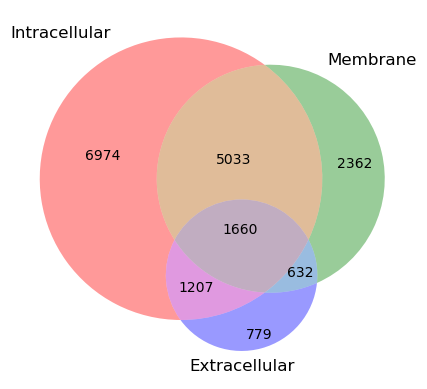

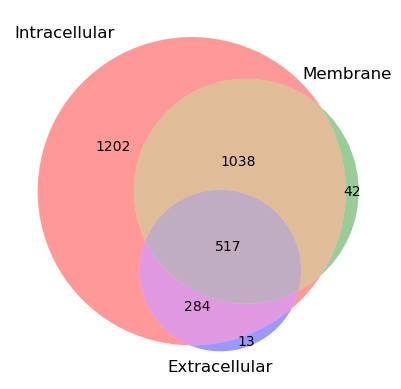

In [7]:
poop = 'Experimental data/PCM-52_MS2_ANOVA_UniPep1.xlsx'
make_large_scale_venn(poop)

In [6]:
#Experimental data goes here as the directory_of_data. This excel file should be taken directly from Proteome
#Discoverer export function and include any columns you would like to analyze.
directory_of_data = 'Experimental data/Ac-79_MS2_ANOVA.xlsx'
df_Ac79 = pd.read_excel(directory_of_data)

print("done")

done


In [14]:
Nuc_matching_dict, Nuc_combined_df = find_nuclear_proteins(directory_of_data)
Endo_matching_dict, Endo_combined_df = find_endomembrane_proteins(directory_of_data)
Cyto_matching_dict, Cyto_combined_df = find_cytoplasm_proteins(directory_of_data)
Mem_matching_dict, Mem_combined_df = find_membrane_proteins(directory_of_data)
Extra_matching_dict, Extra_combined_df = find_extracellular_proteins(directory_of_data)

print("done")

done


In [15]:
directory_of_data='Experimental data/Ac-79_MS2_ANOVA_PUB2.xlsx'
print('done')

done


In [16]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 1)]
df_enrich_data.to_excel('Experimental data/Ac-79_MS2_ANOVA_postive_enrich.xlsx')
print('done')

done


In [17]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 1.3)]
df_enrich_data.to_excel('Experimental data/Ac-79_MS2_ANOVA_1p3_enrich.xlsx')
print('done')

done


In [18]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 1.6)]
df_enrich_data.to_excel('Experimental data/Ac-79_MS2_ANOVA_1p6_enrich.xlsx')
print('done')

done


In [19]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 1.9)]
df_enrich_data.to_excel('Experimental data/Ac-79_MS2_ANOVA_1p9_enrich.xlsx')
print('done')

done


In [20]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 2)]
df_enrich_data.to_excel('Experimental data/Ac-79_MS2_ANOVA_2_enrich.xlsx')
print('done')

done


In [8]:
directory_of_data='Experimental data/Ac-79_MS2_ANOVA_UniPep1.xlsx'
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 1)]
df_enrich_data.to_excel('Experimental data/M-Ac79/Ac-79_MS2_ANOVA_UniPep1_postive_enrich.xlsx')
df_enrich_data = df_data.loc[(df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 1)]
df_enrich_data.to_excel('Experimental data/M-Ac79/Ac-79_MS2_ANOVA_UniPep1_postive_enrich_nosig.xlsx')
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 1.3)]
df_enrich_data.to_excel('Experimental data/M-Ac79/Ac-79_MS2_ANOVA_UniPep1_1p3.xlsx')
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 1.6)]
df_enrich_data.to_excel('Experimental data/M-Ac79/Ac-79_MS2_ANOVA_UniPep1_1p6.xlsx')
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 1.9)]
df_enrich_data.to_excel('Experimental data/M-Ac79/Ac-79_MS2_ANOVA_UniPep1_1p9.xlsx')
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (DAAM) / (DMSO)'] <= 0.05) & (df_data['Abundance Ratio: (DAAM) / (DMSO)'] >= 2)]
df_enrich_data.to_excel('Experimental data/M-Ac79/Ac-79_MS2_ANOVA_UniPep1_2.xlsx')

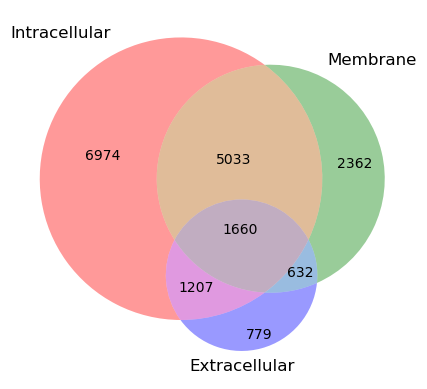

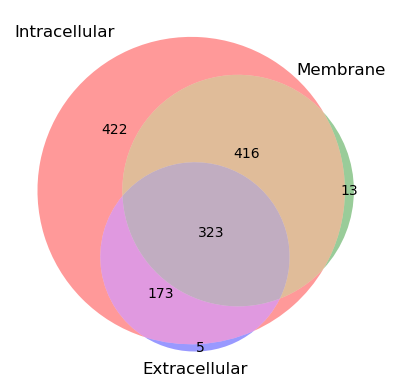

In [9]:
directory_of_enrich_data = 'Experimental data/M-Ac79/Ac-79_MS2_ANOVA_Unipep1_postive_enrich_nosig.xlsx'
make_large_scale_venn(directory_of_enrich_data)

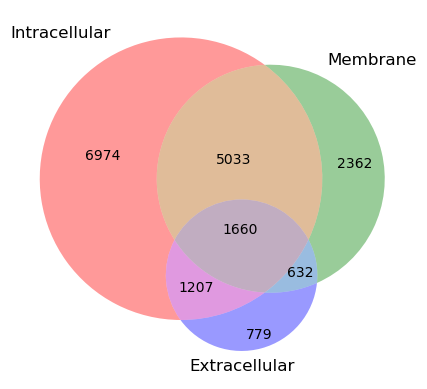

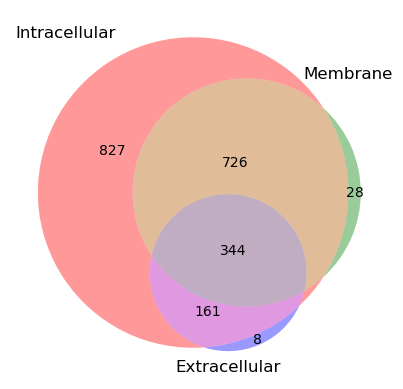

In [10]:
directory_of_enrich_data = 'Experimental data/M-PCM52/PCM-52_MS2_ANOVA_Unipep1_postive_enrich_nosig.xlsx'
make_large_scale_venn(directory_of_enrich_data)

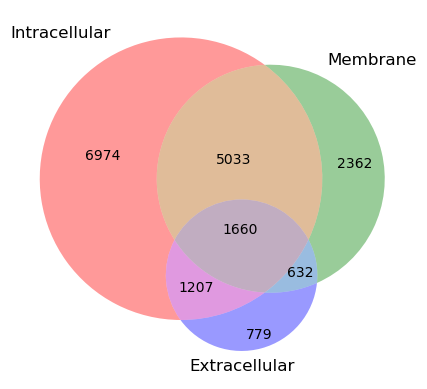

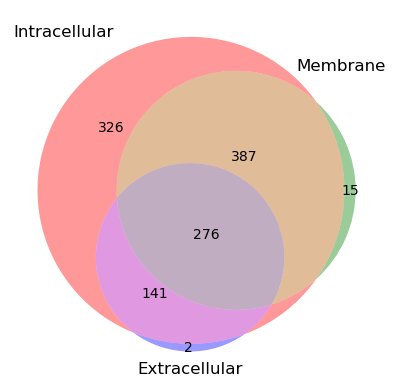

In [11]:
directory_of_enrich_data = 'Experimental data/M-PCM50/PCM-50_MS2_ANOVA_Unipep1_postive_enrich_nosig.xlsx'
make_large_scale_venn(directory_of_enrich_data)

In [35]:
output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)

{'Matches_actin cytoskeleton.xlsx': 46, 'Matches_aggresome.xlsx': 2, 'Matches_centrosome.xlsx': 35, 'Matches_cleavage furrow.xlsx': 4, 'Matches_cytoplasm.xlsx': 587, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 32, 'Matches_cytoskeleton.xlsx': 137, 'Matches_cytosol.xlsx': 425, 'Matches_flemming body.xlsx': 4, 'Matches_focal adhesion.xlsx': 79, 'Matches_intercellular bridge.xlsx': 1, 'Matches_intermediate filament cytoskeleton.xlsx': 5, 'Matches_microtubule cytoskeleton.xlsx': 84, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 22, 'Matches_mitochondrion.xlsx': 105, 'Matches_mitotic spindle.xlsx': 13}
{'Matches_clathrin-coated pit.xlsx': 9, 'Matches_endomembrane system.xlsx': 224, 'Matches_endoplasmic reticulum.xlsx': 96, 'Matches_endosome.xlsx': 40, 'Matches_golgi apparatus.xlsx': 43, 'Matches_lipid droplet.xlsx': 8, 'Matches_lysosome.xlsx': 42, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 6, 'Matches_retromer complex.xlsx': 1, 'Matches_secretory granule.

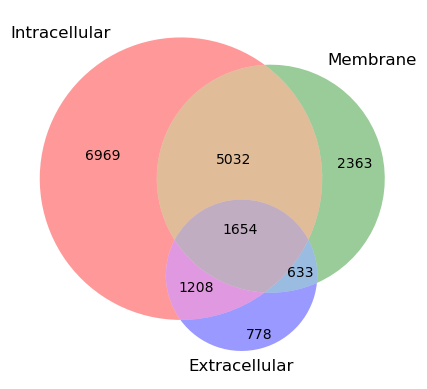

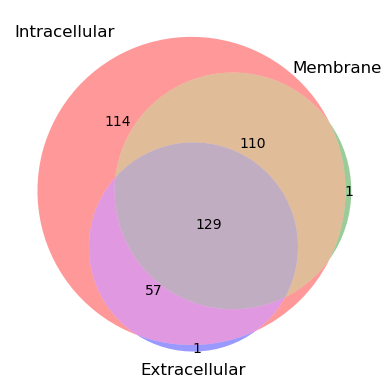

In [36]:
directory_of_enrich_data = 'Experimental data/Ac-79_MS2_ANOVA_1p3_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

In [37]:
output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

{'Matches_actin cytoskeleton.xlsx': 30, 'Matches_aggresome.xlsx': 1, 'Matches_centrosome.xlsx': 20, 'Matches_cleavage furrow.xlsx': 3, 'Matches_cytoplasm.xlsx': 369, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 20, 'Matches_cytoskeleton.xlsx': 84, 'Matches_cytosol.xlsx': 259, 'Matches_flemming body.xlsx': 3, 'Matches_focal adhesion.xlsx': 59, 'Matches_intercellular bridge.xlsx': 1, 'Matches_intermediate filament cytoskeleton.xlsx': 4, 'Matches_microtubule cytoskeleton.xlsx': 44, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 15, 'Matches_mitochondrion.xlsx': 62, 'Matches_mitotic spindle.xlsx': 7}
{'Matches_clathrin-coated pit.xlsx': 4, 'Matches_endomembrane system.xlsx': 141, 'Matches_endoplasmic reticulum.xlsx': 72, 'Matches_endosome.xlsx': 23, 'Matches_golgi apparatus.xlsx': 27, 'Matches_lipid droplet.xlsx': 7, 'Matches_lysosome.xlsx': 29, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 3, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xls

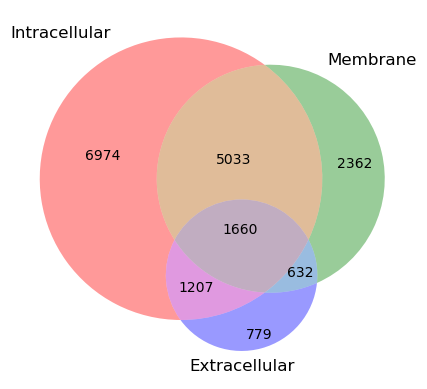

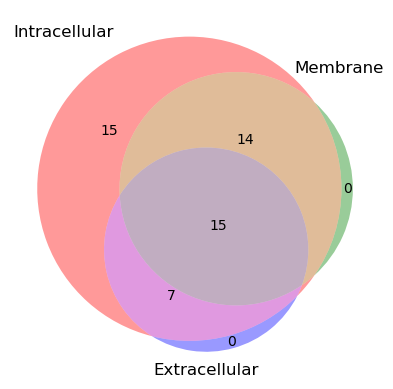

In [16]:
directory_of_enrich_data = 'Experimental data/M-Ac79/Ac-79_MS2_ANOVA_1p6_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

In [41]:
output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)

{'Matches_actin cytoskeleton.xlsx': 2, 'Matches_aggresome.xlsx': 0, 'Matches_centrosome.xlsx': 1, 'Matches_cleavage furrow.xlsx': 0, 'Matches_cytoplasm.xlsx': 49, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 1, 'Matches_cytoskeleton.xlsx': 6, 'Matches_cytosol.xlsx': 36, 'Matches_flemming body.xlsx': 0, 'Matches_focal adhesion.xlsx': 11, 'Matches_intercellular bridge.xlsx': 0, 'Matches_intermediate filament cytoskeleton.xlsx': 0, 'Matches_microtubule cytoskeleton.xlsx': 3, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 2, 'Matches_mitochondrion.xlsx': 8, 'Matches_mitotic spindle.xlsx': 1}
{'Matches_clathrin-coated pit.xlsx': 0, 'Matches_endomembrane system.xlsx': 19, 'Matches_endoplasmic reticulum.xlsx': 16, 'Matches_endosome.xlsx': 2, 'Matches_golgi apparatus.xlsx': 4, 'Matches_lipid droplet.xlsx': 0, 'Matches_lysosome.xlsx': 2, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 0, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xlsx': 3, 'Match

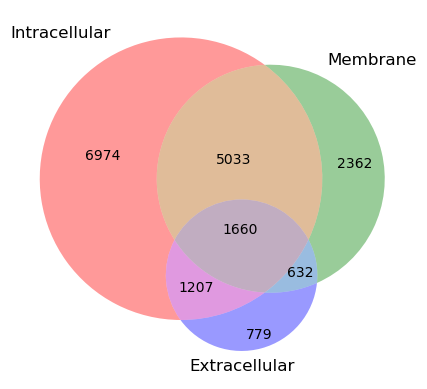

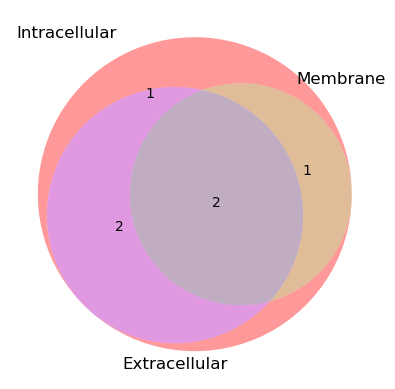

In [9]:
directory_of_enrich_data = 'Experimental data/Ac-79_MS2_ANOVA_1p9_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)


In [11]:
output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)
output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)

print(counts_df)

{'Matches_actin cytoskeleton.xlsx': 0, 'Matches_aggresome.xlsx': 0, 'Matches_centrosome.xlsx': 0, 'Matches_cleavage furrow.xlsx': 0, 'Matches_cytoplasm.xlsx': 6, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 0, 'Matches_cytoskeleton.xlsx': 0, 'Matches_cytosol.xlsx': 5, 'Matches_flemming body.xlsx': 0, 'Matches_focal adhesion.xlsx': 0, 'Matches_intercellular bridge.xlsx': 0, 'Matches_intermediate filament cytoskeleton.xlsx': 0, 'Matches_microtubule cytoskeleton.xlsx': 0, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 0, 'Matches_mitochondrion.xlsx': 2, 'Matches_mitotic spindle.xlsx': 0}
{'Matches_clathrin-coated pit.xlsx': 0, 'Matches_endomembrane system.xlsx': 2, 'Matches_endoplasmic reticulum.xlsx': 2, 'Matches_endosome.xlsx': 0, 'Matches_golgi apparatus.xlsx': 0, 'Matches_lipid droplet.xlsx': 0, 'Matches_lysosome.xlsx': 0, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 0, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xlsx': 0, 'Matches_sp

In [19]:
directory_of_data='Experimental data/PCM50_ANOVA_PUB.xlsx'
print('done')

done


In [20]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio: (photo) / (min)'] >= 1)]
df_enrich_data.to_excel('Experimental data/PCM-50_MS2_ANOVA_postive_enrich_nosig.xlsx')
print('done')

done


In [10]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1)]
df_enrich_data.to_excel('Experimental data/PCM-50_MS2_ANOVA_postive_enrich.xlsx')
print('done')

done


In [11]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.3)]
df_enrich_data.to_excel('Experimental data/PCM-50_MS2_ANOVA_1p3_enrich.xlsx')
print('done')

done


In [12]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.6)]
df_enrich_data.to_excel('Experimental data/PCM-50_MS2_ANOVA_1p6_enrich.xlsx')
print('done')

done


In [13]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.9)]
df_enrich_data.to_excel('Experimental data/PCM-50_MS2_ANOVA_1p9_enrich.xlsx')
print('done')

done


In [21]:
directory_of_data='Experimental data/PCM-50_MS2_ANOVA_UniPep1.xlsx'

df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio: (photo) / (min)'] >= 1)]
df_enrich_data.to_excel('Experimental data/M-PCM50/PCM-50_MS2_ANOVA_UniPep1_postive_enrich_nosig.xlsx')
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1)]
df_enrich_data.to_excel('Experimental data/M-PCM50/PCM-50_MS2_ANOVA_UniPep1_postive_enrich.xlsx')
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.3)]
df_enrich_data.to_excel('Experimental data/M-PCM50/PCM-50_MS2_ANOVA_UniPep1_1p3.xlsx')
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.6)]
df_enrich_data.to_excel('Experimental data/M-PCM50/PCM-50_MS2_ANOVA_UniPep1_1p6.xlsx')
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.9)]
df_enrich_data.to_excel('Experimental data/M-PCM50/PCM-50_MS2_ANOVA_UniPep1_1p9.xlsx')

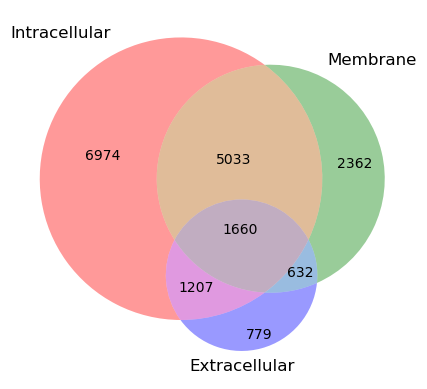

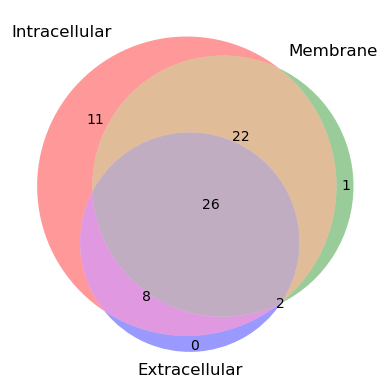

{'Matches_actin cytoskeleton.xlsx': 5, 'Matches_aggresome.xlsx': 0, 'Matches_centrosome.xlsx': 2, 'Matches_cleavage furrow.xlsx': 0, 'Matches_cytoplasm.xlsx': 63, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 1, 'Matches_cytoskeleton.xlsx': 13, 'Matches_cytosol.xlsx': 32, 'Matches_flemming body.xlsx': 1, 'Matches_focal adhesion.xlsx': 10, 'Matches_intercellular bridge.xlsx': 2, 'Matches_intermediate filament cytoskeleton.xlsx': 2, 'Matches_microtubule cytoskeleton.xlsx': 6, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 4, 'Matches_mitochondrion.xlsx': 14, 'Matches_mitotic spindle.xlsx': 0}
{'Matches_clathrin-coated pit.xlsx': 3, 'Matches_endomembrane system.xlsx': 39, 'Matches_endoplasmic reticulum.xlsx': 15, 'Matches_endosome.xlsx': 17, 'Matches_golgi apparatus.xlsx': 14, 'Matches_lipid droplet.xlsx': 0, 'Matches_lysosome.xlsx': 17, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 0, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xlsx': 16, 

In [14]:
directory_of_enrich_data = 'Experimental data/PCM-50_MS2_ANOVA_postive_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

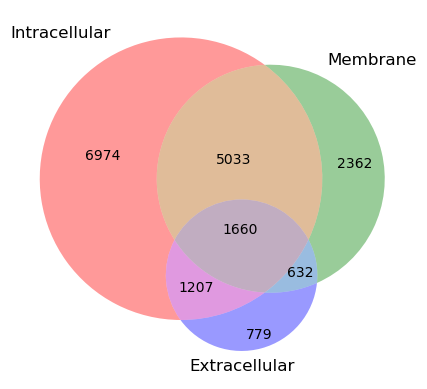

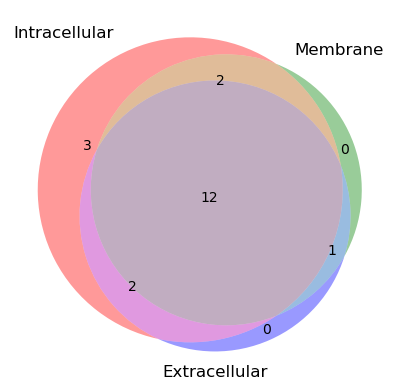

{'Matches_actin cytoskeleton.xlsx': 0, 'Matches_aggresome.xlsx': 0, 'Matches_centrosome.xlsx': 0, 'Matches_cleavage furrow.xlsx': 0, 'Matches_cytoplasm.xlsx': 18, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 0, 'Matches_cytoskeleton.xlsx': 3, 'Matches_cytosol.xlsx': 7, 'Matches_flemming body.xlsx': 0, 'Matches_focal adhesion.xlsx': 3, 'Matches_intercellular bridge.xlsx': 0, 'Matches_intermediate filament cytoskeleton.xlsx': 1, 'Matches_microtubule cytoskeleton.xlsx': 1, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 0, 'Matches_mitochondrion.xlsx': 5, 'Matches_mitotic spindle.xlsx': 0}
{'Matches_clathrin-coated pit.xlsx': 2, 'Matches_endomembrane system.xlsx': 12, 'Matches_endoplasmic reticulum.xlsx': 5, 'Matches_endosome.xlsx': 7, 'Matches_golgi apparatus.xlsx': 4, 'Matches_lipid droplet.xlsx': 0, 'Matches_lysosome.xlsx': 6, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 0, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xlsx': 7, 'Matches_

In [15]:
directory_of_enrich_data = 'Experimental data/PCM-50_MS2_ANOVA_1p3_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

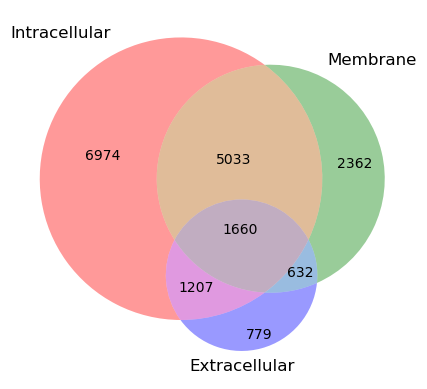

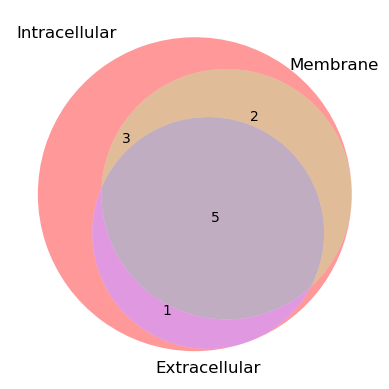

{'Matches_actin cytoskeleton.xlsx': 0, 'Matches_aggresome.xlsx': 0, 'Matches_centrosome.xlsx': 0, 'Matches_cleavage furrow.xlsx': 0, 'Matches_cytoplasm.xlsx': 10, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 0, 'Matches_cytoskeleton.xlsx': 1, 'Matches_cytosol.xlsx': 3, 'Matches_flemming body.xlsx': 0, 'Matches_focal adhesion.xlsx': 1, 'Matches_intercellular bridge.xlsx': 0, 'Matches_intermediate filament cytoskeleton.xlsx': 0, 'Matches_microtubule cytoskeleton.xlsx': 0, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 0, 'Matches_mitochondrion.xlsx': 2, 'Matches_mitotic spindle.xlsx': 0}
{'Matches_clathrin-coated pit.xlsx': 0, 'Matches_endomembrane system.xlsx': 6, 'Matches_endoplasmic reticulum.xlsx': 4, 'Matches_endosome.xlsx': 1, 'Matches_golgi apparatus.xlsx': 1, 'Matches_lipid droplet.xlsx': 0, 'Matches_lysosome.xlsx': 4, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 0, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xlsx': 4, 'Matches_s

In [16]:
directory_of_enrich_data = 'Experimental data/PCM-50_MS2_ANOVA_1p6_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

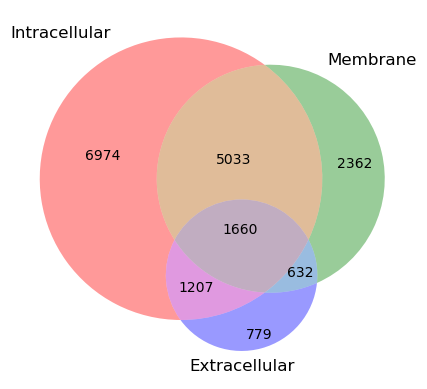

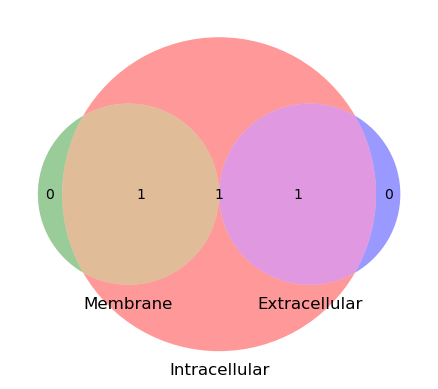

{'Matches_actin cytoskeleton.xlsx': 0, 'Matches_aggresome.xlsx': 0, 'Matches_centrosome.xlsx': 0, 'Matches_cleavage furrow.xlsx': 0, 'Matches_cytoplasm.xlsx': 3, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 0, 'Matches_cytoskeleton.xlsx': 0, 'Matches_cytosol.xlsx': 0, 'Matches_flemming body.xlsx': 0, 'Matches_focal adhesion.xlsx': 0, 'Matches_intercellular bridge.xlsx': 0, 'Matches_intermediate filament cytoskeleton.xlsx': 0, 'Matches_microtubule cytoskeleton.xlsx': 0, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 0, 'Matches_mitochondrion.xlsx': 0, 'Matches_mitotic spindle.xlsx': 0}
{'Matches_clathrin-coated pit.xlsx': 0, 'Matches_endomembrane system.xlsx': 1, 'Matches_endoplasmic reticulum.xlsx': 0, 'Matches_endosome.xlsx': 0, 'Matches_golgi apparatus.xlsx': 0, 'Matches_lipid droplet.xlsx': 0, 'Matches_lysosome.xlsx': 0, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 0, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xlsx': 1, 'Matches_sp

In [17]:
directory_of_enrich_data = 'Experimental data/PCM-50_MS2_ANOVA_1p9_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

In [14]:
directory_of_data='Experimental data/PCM-52_MS2_ANOVA_UniPep1.xlsx'
print('done')

done


In [15]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep1_postive_enrich.xlsx')
print('done')

done


In [16]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio: (photo) / (min)'] >= 1)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep1_postive_enrich_nosig.xlsx')
print('done')

done


In [17]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.3)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep1_1p3_enrich.xlsx')
print('done')

done


In [18]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.6)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep1_1p6_enrich.xlsx')
print('done')

done


In [19]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.9)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep1_1p9_enrich.xlsx')
print('done')

done


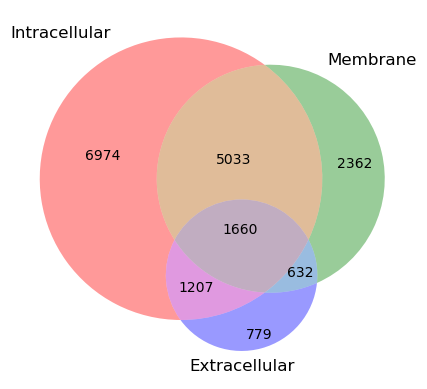

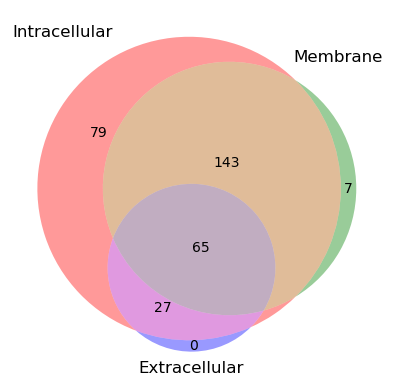

{'Matches_actin cytoskeleton.xlsx': 10, 'Matches_aggresome.xlsx': 2, 'Matches_centrosome.xlsx': 7, 'Matches_cleavage furrow.xlsx': 1, 'Matches_cytoplasm.xlsx': 289, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 5, 'Matches_cytoskeleton.xlsx': 37, 'Matches_cytosol.xlsx': 134, 'Matches_flemming body.xlsx': 1, 'Matches_focal adhesion.xlsx': 20, 'Matches_intercellular bridge.xlsx': 1, 'Matches_intermediate filament cytoskeleton.xlsx': 1, 'Matches_microtubule cytoskeleton.xlsx': 18, 'Matches_microtubule end.xlsx': 1, 'Matches_midbody.xlsx': 4, 'Matches_mitochondrion.xlsx': 68, 'Matches_mitotic spindle.xlsx': 4}
{'Matches_clathrin-coated pit.xlsx': 3, 'Matches_endomembrane system.xlsx': 155, 'Matches_endoplasmic reticulum.xlsx': 82, 'Matches_endosome.xlsx': 36, 'Matches_golgi apparatus.xlsx': 51, 'Matches_lipid droplet.xlsx': 4, 'Matches_lysosome.xlsx': 34, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 3, 'Matches_retromer complex.xlsx': 1, 'Matches_secretory granule.xlsx':

In [7]:
directory_of_enrich_data = 'Experimental data/PCM-52_MS2_ANOVA_UniPep1_postive_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

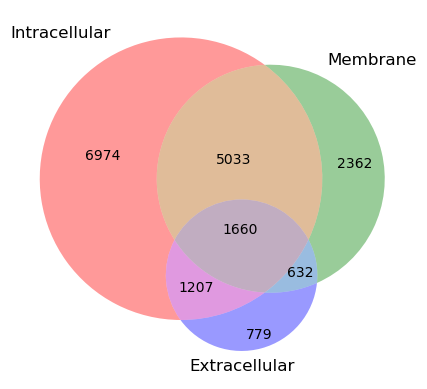

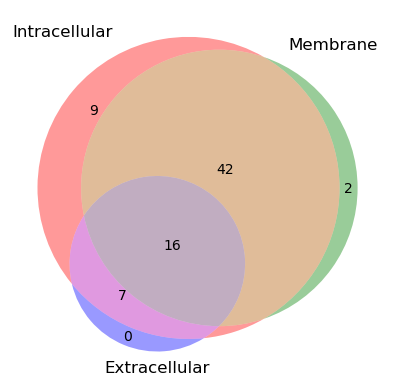

{'Matches_actin cytoskeleton.xlsx': 1, 'Matches_aggresome.xlsx': 0, 'Matches_centrosome.xlsx': 1, 'Matches_cleavage furrow.xlsx': 0, 'Matches_cytoplasm.xlsx': 71, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 0, 'Matches_cytoskeleton.xlsx': 8, 'Matches_cytosol.xlsx': 18, 'Matches_flemming body.xlsx': 0, 'Matches_focal adhesion.xlsx': 3, 'Matches_intercellular bridge.xlsx': 1, 'Matches_intermediate filament cytoskeleton.xlsx': 1, 'Matches_microtubule cytoskeleton.xlsx': 4, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 1, 'Matches_mitochondrion.xlsx': 21, 'Matches_mitotic spindle.xlsx': 1}
{'Matches_clathrin-coated pit.xlsx': 0, 'Matches_endomembrane system.xlsx': 46, 'Matches_endoplasmic reticulum.xlsx': 23, 'Matches_endosome.xlsx': 10, 'Matches_golgi apparatus.xlsx': 17, 'Matches_lipid droplet.xlsx': 1, 'Matches_lysosome.xlsx': 17, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 1, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xlsx': 8, 'Ma

In [10]:
directory_of_enrich_data = 'Experimental data/PCM-52_MS2_ANOVA_UniPep1_1p3_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

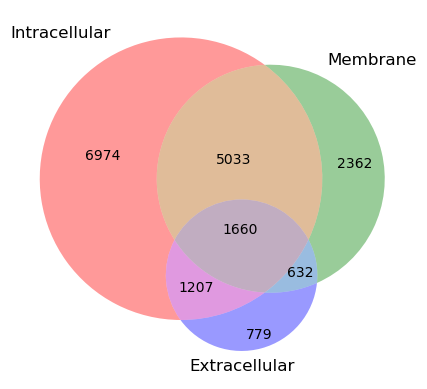

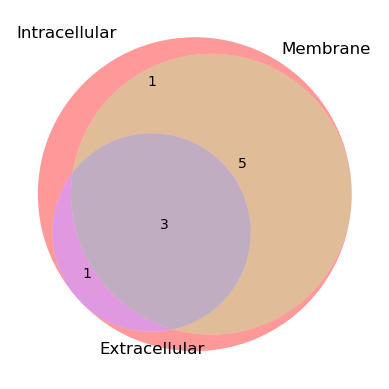

{'Matches_actin cytoskeleton.xlsx': 0, 'Matches_aggresome.xlsx': 0, 'Matches_centrosome.xlsx': 0, 'Matches_cleavage furrow.xlsx': 0, 'Matches_cytoplasm.xlsx': 10, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 0, 'Matches_cytoskeleton.xlsx': 0, 'Matches_cytosol.xlsx': 4, 'Matches_flemming body.xlsx': 0, 'Matches_focal adhesion.xlsx': 0, 'Matches_intercellular bridge.xlsx': 0, 'Matches_intermediate filament cytoskeleton.xlsx': 0, 'Matches_microtubule cytoskeleton.xlsx': 0, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 0, 'Matches_mitochondrion.xlsx': 5, 'Matches_mitotic spindle.xlsx': 0}
{'Matches_clathrin-coated pit.xlsx': 0, 'Matches_endomembrane system.xlsx': 5, 'Matches_endoplasmic reticulum.xlsx': 3, 'Matches_endosome.xlsx': 1, 'Matches_golgi apparatus.xlsx': 2, 'Matches_lipid droplet.xlsx': 0, 'Matches_lysosome.xlsx': 2, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 0, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xlsx': 2, 'Matches_s

In [11]:
directory_of_enrich_data = 'Experimental data/PCM-52_MS2_ANOVA_UniPep1_1p6_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

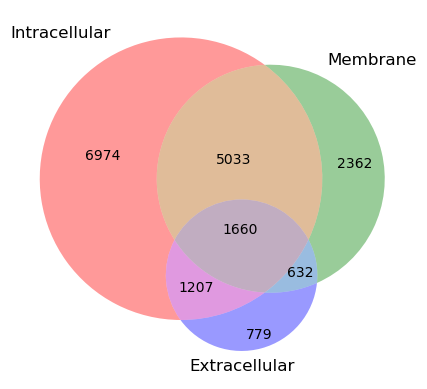

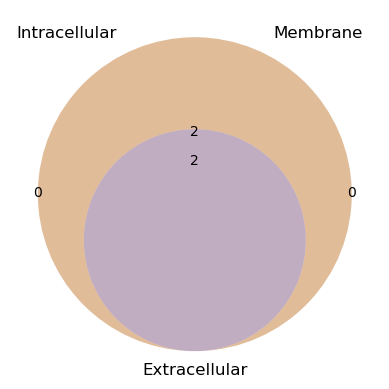

{'Matches_actin cytoskeleton.xlsx': 0, 'Matches_aggresome.xlsx': 0, 'Matches_centrosome.xlsx': 0, 'Matches_cleavage furrow.xlsx': 0, 'Matches_cytoplasm.xlsx': 4, 'Matches_cytoplasmic ribonucleoprotein granule.xlsx': 0, 'Matches_cytoskeleton.xlsx': 0, 'Matches_cytosol.xlsx': 2, 'Matches_flemming body.xlsx': 0, 'Matches_focal adhesion.xlsx': 0, 'Matches_intercellular bridge.xlsx': 0, 'Matches_intermediate filament cytoskeleton.xlsx': 0, 'Matches_microtubule cytoskeleton.xlsx': 0, 'Matches_microtubule end.xlsx': 0, 'Matches_midbody.xlsx': 0, 'Matches_mitochondrion.xlsx': 2, 'Matches_mitotic spindle.xlsx': 0}
{'Matches_clathrin-coated pit.xlsx': 0, 'Matches_endomembrane system.xlsx': 2, 'Matches_endoplasmic reticulum.xlsx': 1, 'Matches_endosome.xlsx': 1, 'Matches_golgi apparatus.xlsx': 0, 'Matches_lipid droplet.xlsx': 0, 'Matches_lysosome.xlsx': 1, 'Matches_omegasome.xlsx': 0, 'Matches_peroxisome.xlsx': 0, 'Matches_retromer complex.xlsx': 0, 'Matches_secretory granule.xlsx': 1, 'Matches_sp

In [12]:
directory_of_enrich_data = 'Experimental data/PCM-52_MS2_ANOVA_UniPep1_1p9_enrich.xlsx'
make_large_scale_venn(directory_of_enrich_data)

output_data = 'Output data/Cytoplasm proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Endomembrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Extracellular proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Membrane proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

output_data = 'Output data/Nuclear proteins'
indiv_dfs, counts_df = read_counts_excel_files(output_data)
print(counts_df)

In [8]:
directory_of_data='Experimental data/PCM-52_MS2_ANOVA_UniPep2.xlsx'
print('done')


done


In [13]:
df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep2_postive_enrich.xlsx')


df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio: (photo) / (min)'] >= 1)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep2_postive_enrich_nosig.xlsx')


df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.3)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep2_1p3_enrich.xlsx')
print('done')


df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.6)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep2_1p6_enrich.xlsx')


df_data = pd.read_excel(directory_of_data)
df_enrich_data = df_data.loc[(df_data['Abundance Ratio P-Value: (photo) / (min)'] <= 0.05) & (df_data['Abundance Ratio: (photo) / (min)'] >= 1.9)]
df_enrich_data.to_excel('Experimental data/PCM-52_MS2_ANOVA_UniPep2_1p9_enrich.xlsx')
print('done')

done
done


In [7]:
df_Ac79_top20 = top_20_percent(df_Ac79, '-log(p-value)')

In [8]:
df_Ac79_top20.head()

,Checked,Protein FDR Confidence: Combined,Master,Accession,Description,Exp. q-value: Combined,Sum PEP Score,Coverage [%],# Peptides,# PSMs,...,Abundances (Grouped): 3X comp w Heroin,Abundances (Grouped): DAAM,Abundances (Grouped): DMSO,Abundances (Grouped): none,Abundances (Grouped) CV [%]: 3X comp w Heroin,Abundances (Grouped) CV [%]: DAAM,Abundances (Grouped) CV [%]: DMSO,Abundances (Grouped) CV [%]: none,# Protein Groups,-log(p-value)
0,False,High,Master Protein,P41223,Protein BUD31 homolog OS=Homo sapiens OX=9606 ...,0.0,8.711,15,3,3,...,1.195579e+06,1.403887e+06,8.386263e+05,1.638989e+06,2.38,1.78,2.83,NaN,1,14.274475
1,False,High,Master Protein,P22307,Non-specific lipid-transfer protein OS=Homo sa...,0.0,6.144,2,2,2,...,5.444867e+05,6.266700e+05,3.970738e+05,6.370791e+05,4.89,0.73,0.20,NaN,1,12.801791
2,False,High,Master Protein,Q16832,Discoidin domain-containing receptor 2 OS=Homo...,0.0,8.212,4,3,4,...,3.984163e+06,4.513299e+06,2.750489e+06,4.565773e+06,2.29,2.50,2.88,NaN,1,13.590406
3,False,High,Master Protein,P30153,Serine/threonine-protein phosphatase 2A 65 kDa...,0.0,17.437,13,9,14,...,5.478098e+06,6.053570e+06,3.353398e+06,4.634539e+06,2.39,2.18,3.00,NaN,1,14.594716
4,False,High,Master Protein,P05141,ADP/ATP translocase 2 OS=Homo sapiens OX=9606 ...,0.0,30.325,31,11,17,...,8.471390e+06,1.008210e+07,6.312400e+06,1.085303e+07,3.19,5.54,2.44,NaN,1,11.359749


In [9]:
df_Ac79_top20.to_excel('Experimental data/Ac-79_MS2_ANOVA_top20.xlsx')

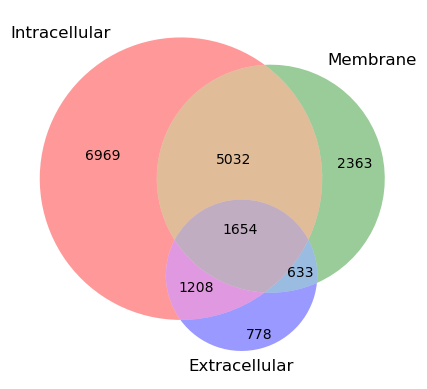

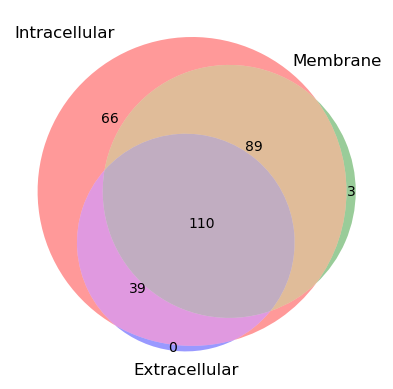

In [12]:
directory_of_data='Experimental data/Ac-79_MS2_ANOVA_top20.xlsx'
make_large_scale_venn(directory_of_data)
    

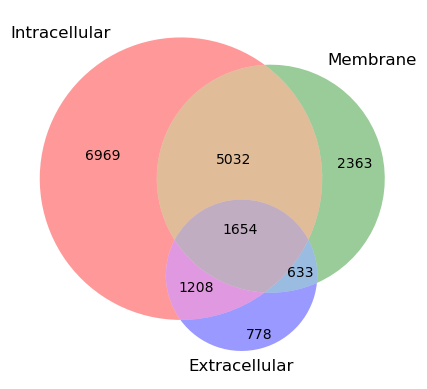

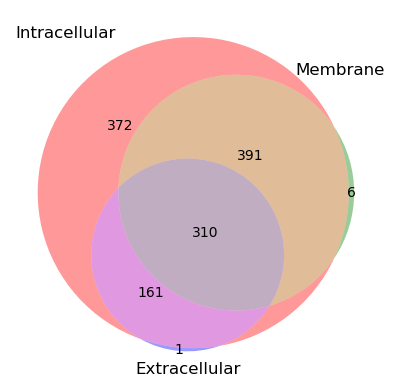

In [31]:
directory_of_data='Experimental data/Ac-79_MS2_ANOVA_PUB2.xlsx'
make_large_scale_venn(directory_of_data)

In [15]:
Nuc_Endo_df = pd.concat([Nuc_combined_df, Endo_combined_df], axis=0, join='inner', ignore_index=True)
Nuc_Endo_df = Nuc_Endo_df.drop_duplicates()

Nuc_Cyto_df = pd.concat([Nuc_combined_df, Cyto_combined_df], axis=0, join='inner', ignore_index=True)
Nuc_Cyto_df = Nuc_Cyto_df.drop_duplicates()

Cyto_Endo_df = pd.concat([Cyto_combined_df, Endo_combined_df], axis=0, join='inner', ignore_index=True)
Cyto_Endo_df = Cyto_Endo_df.drop_duplicates()

Nuc_Cyto_Endo_df = pd.concat([Nuc_Cyto_df, Endo_combined_df], axis=0, join='inner', ignore_index=True)
Nuc_Cyto_Endo_df = Nuc_Cyto_Endo_df.drop_duplicates()

Nuc_Cyto_Endo_Mem_df = pd.concat([Nuc_Cyto_Endo_df, Mem_combined_df], axis=0, join='inner', ignore_index=True)
Nuc_Cyto_Endo_Mem_df = Nuc_Cyto_Endo_Mem_df.drop_duplicates()

Nuc_Cyto_Endo_Mem_Extra_df = pd.concat([Nuc_Cyto_Endo_Mem_df, Extra_combined_df], axis=0, join='inner', ignore_index=True)
Nuc_Cyto_Endo_Mem_Extra_df = Nuc_Cyto_Endo_Mem_Extra_df.drop_duplicates()



print(len(Nuc_Endo_df), 
      len(Nuc_Cyto_df), 
      len(Cyto_Endo_df), 
      len(Nuc_Cyto_Endo_df), 
      len(Nuc_Cyto_Endo_Mem_df),
      len(Nuc_Cyto_Endo_Mem_Extra_df))


11364 14863 12677 15157 18135 18913


In [16]:
df_wholeproteome = pd.read_excel('wholeproteome.xlsx')

In [7]:
for key in Nuc_matching_dict.keys():
    print(key)
Count_Nuc_df = Nuc_matching_dict.get("Matches_nucleus.xlsx")
print(len(Count_Nuc_df))

Matches_chromosome.xlsx
Matches_nuclear envelope.xlsx
Matches_nuclear lumen.xlsx
Matches_nucleolus.xlsx
Matches_nucleoplasm.xlsx
Matches_nucleus.xlsx
1107


In [8]:
for key in Endo_matching_dict.keys():
    print(key)
Count_Endo_df = Endo_matching_dict.get("Matches_endoplasmic reticulum.xlsx")
print(len(Count_Endo_df))

Matches_clathrin-coated pit.xlsx
Matches_endomembrane system.xlsx
Matches_endoplasmic reticulum.xlsx
Matches_endosome.xlsx
Matches_golgi apparatus.xlsx
Matches_lipid droplet.xlsx
Matches_lysosome.xlsx
Matches_omegasome.xlsx
Matches_peroxisome.xlsx
Matches_retromer complex.xlsx
Matches_secretory granule.xlsx
Matches_spine apparatus.xlsx
Matches_transport vesicle.xlsx
255


In [9]:
for key in Cyto_matching_dict.keys():
    print(key)
Count_Cyto_df = Cyto_matching_dict.get("Matches_cytoplasm.xlsx")
print(len(Count_Cyto_df))

Matches_actin cytoskeleton.xlsx
Matches_aggresome.xlsx
Matches_centrosome.xlsx
Matches_cleavage furrow.xlsx
Matches_cytoplasm.xlsx
Matches_cytoplasmic ribonucleoprotein granule.xlsx
Matches_cytoskeleton.xlsx
Matches_cytosol.xlsx
Matches_flemming body.xlsx
Matches_focal adhesion.xlsx
Matches_intercellular bridge.xlsx
Matches_intermediate filament cytoskeleton.xlsx
Matches_microtubule cytoskeleton.xlsx
Matches_microtubule end.xlsx
Matches_midbody.xlsx
Matches_mitochondrion.xlsx
Matches_mitotic spindle.xlsx
1514


In [10]:
for key in Mem_matching_dict.keys():
    print(key)
Count_Mem_df = Mem_matching_dict.get("Matches_membrane.xlsx")
print(len(Count_Mem_df))

Matches_extrinsic component of membrane.xlsx
Matches_membrane.xlsx
969


In [11]:
df_Ac79 = pd.read_excel(directory_of_data)
print(len(df_Ac79))

1764


In [12]:
Experiment_Nuc_Endo_df = pd.merge(Count_Nuc_df, Count_Endo_df, on='Entry', how='inner')
Experiment_Nuc_Cyto_df = pd.merge(Count_Nuc_df, Count_Cyto_df, on='Entry', how='inner')
Experiment_Cyto_Endo_df = pd.merge(Count_Cyto_df, Count_Endo_df, on='Entry', how='inner')
Experiment_Nuc_Cyto_Endo_df = pd.merge(Experiment_Nuc_Cyto_df, Count_Endo_df, on='Entry', how='inner')
print(len(Experiment_Nuc_Endo_df), len(Experiment_Nuc_Cyto_df), len(Experiment_Cyto_Endo_df), len(Experiment_Nuc_Cyto_Endo_df))

114 895 255 114


In [13]:
(1107+255+1514)-(114+895+255-114)

1726

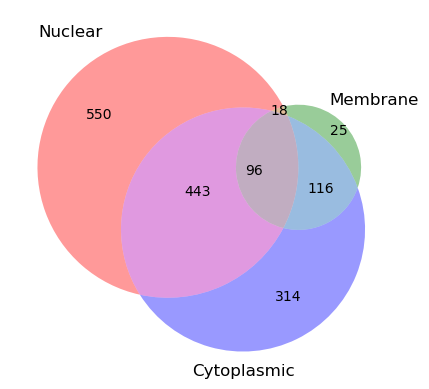

In [43]:

# assuming df1, df2, df3 are your dataframes and 'col' is the column of interest
set1 = set(Count_Nuc_df['Entry'])
set2 = set(Count_Endo_df['Entry'])
set3 = set(Count_Mem_df['Entry'])

venn3([set1, set2, set3], ('Nuclear', 'Membrane', 'Cytoplasmic'))
plt.show()

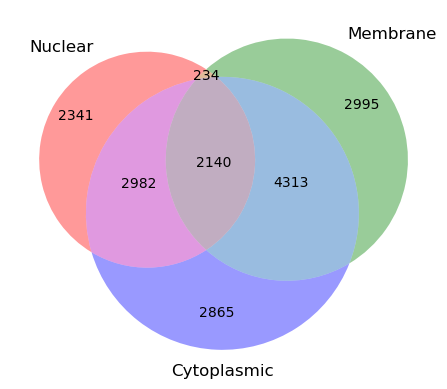

In [15]:
set1 = set(Nuc_combined_df['Entry'])
set2 = set(Mem_combined_df['Entry'])
set3 = set(Cyto_combined_df['Entry'])

venn3([set1, set2, set3], ('Nuclear', 'Membrane', 'Cytoplasmic'))
plt.show()

In [18]:
Nuc_Cyto_Endo_df.head()

,Entry,Reviewed_x,Entry Name_x,Protein names_x,Gene Names_x,Organism_x,Length_x,Gene Ontology (GO)_x,Gene Ontology (cellular component)_x,Reviewed_y,...,Gene Ontology (GO)_y,Gene Ontology (cellular component)_y,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Gene Ontology (GO),Gene Ontology (cellular component)
0,O00255,reviewed,MEN1_HUMAN,Menin,MEN1 SCG2,Homo sapiens (Human),615,"chromatin [GO:0000785]; chromosome, telomeric ...","chromatin [GO:0000785]; chromosome, telomeric ...",reviewed,...,"chromatin [GO:0000785]; chromosome, telomeric ...","chromatin [GO:0000785]; chromosome, telomeric ...",reviewed,MEN1_HUMAN,Menin,MEN1 SCG2,Homo sapiens (Human),615,"chromatin [GO:0000785]; chromosome, telomeric ...","chromatin [GO:0000785]; chromosome, telomeric ..."
1,O14576,reviewed,DC1I1_HUMAN,Cytoplasmic dynein 1 intermediate chain 1 (Cyt...,DYNC1I1 DNCI1 DNCIC1,Homo sapiens (Human),645,cytoplasm [GO:0005737]; cytoplasmic dynein com...,cytoplasm [GO:0005737]; cytoplasmic dynein com...,reviewed,...,cytoplasm [GO:0005737]; cytoplasmic dynein com...,cytoplasm [GO:0005737]; cytoplasmic dynein com...,reviewed,DC1I1_HUMAN,Cytoplasmic dynein 1 intermediate chain 1 (Cyt...,DYNC1I1 DNCI1 DNCIC1,Homo sapiens (Human),645,cytoplasm [GO:0005737]; cytoplasmic dynein com...,cytoplasm [GO:0005737]; cytoplasmic dynein com...
2,O14744,reviewed,ANM5_HUMAN,Protein arginine N-methyltransferase 5 (PRMT5)...,PRMT5 HRMT1L5 IBP72 JBP1 SKB1,Homo sapiens (Human),637,chromatin [GO:0000785]; cytoplasm [GO:0005737]...,chromatin [GO:0000785]; cytoplasm [GO:0005737]...,reviewed,...,chromatin [GO:0000785]; cytoplasm [GO:0005737]...,chromatin [GO:0000785]; cytoplasm [GO:0005737]...,reviewed,ANM5_HUMAN,Protein arginine N-methyltransferase 5 (PRMT5)...,PRMT5 HRMT1L5 IBP72 JBP1 SKB1,Homo sapiens (Human),637,chromatin [GO:0000785]; cytoplasm [GO:0005737]...,chromatin [GO:0000785]; cytoplasm [GO:0005737]...
3,O14980,reviewed,XPO1_HUMAN,Exportin-1 (Exp1) (Chromosome region maintenan...,XPO1 CRM1,Homo sapiens (Human),1071,annulate lamellae [GO:0005642]; Cajal body [GO...,annulate lamellae [GO:0005642]; Cajal body [GO...,reviewed,...,annulate lamellae [GO:0005642]; Cajal body [GO...,annulate lamellae [GO:0005642]; Cajal body [GO...,reviewed,XPO1_HUMAN,Exportin-1 (Exp1) (Chromosome region maintenan...,XPO1 CRM1,Homo sapiens (Human),1071,annulate lamellae [GO:0005642]; Cajal body [GO...,annulate lamellae [GO:0005642]; Cajal body [GO...
4,O15144,reviewed,ARPC2_HUMAN,Actin-related protein 2/3 complex subunit 2 (A...,ARPC2 ARC34 PRO2446,Homo sapiens (Human),300,actin cytoskeleton [GO:0015629]; Arp2/3 protei...,actin cytoskeleton [GO:0015629]; Arp2/3 protei...,reviewed,...,actin cytoskeleton [GO:0015629]; Arp2/3 protei...,actin cytoskeleton [GO:0015629]; Arp2/3 protei...,reviewed,ARPC2_HUMAN,Actin-related protein 2/3 complex subunit 2 (A...,ARPC2 ARC34 PRO2446,Homo sapiens (Human),300,actin cytoskeleton [GO:0015629]; Arp2/3 protei...,actin cytoskeleton [GO:0015629]; Arp2/3 protei...


In [19]:
df_wholeproteome.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Sequence,Function [CC],Keywords,...,Developmental stage,Gene Ontology (GO),Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Subcellular location [CC],PTM,Domain [CC],C-term AA,C-term 2AA
0,A0A087X1C5,reviewed,CP2D7_HUMAN,Putative cytochrome P450 2D7 (EC 1.14.14.1),CYP2D7,Homo sapiens (Human),515,MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...,FUNCTION: May be responsible for the metabolis...,Cytoplasm;Glycoprotein;Heme;Iron;Membrane;Meta...,...,NaN,cytoplasm [GO:0005737]; intracellular membrane...,arachidonic acid metabolic process [GO:0019369...,cytoplasm [GO:0005737]; intracellular membrane...,aromatase activity [GO:0070330]; heme binding ...,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,NaN,NaN,R,PR
1,A0A0B4J2F0,reviewed,PIOS1_HUMAN,Protein PIGBOS1 (PIGB opposite strand protein 1),PIGBOS1,Homo sapiens (Human),54,MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...,FUNCTION: Plays a role in regulation of the un...,Direct protein sequencing;Membrane;Mitochondri...,...,NaN,mitochondrial outer membrane [GO:0005741]; reg...,regulation of endoplasmic reticulum unfolded p...,mitochondrial outer membrane [GO:0005741],NaN,SUBCELLULAR LOCATION: Mitochondrion outer memb...,NaN,NaN,S,KS
2,A0A0B4J2F2,reviewed,SIK1B_HUMAN,Putative serine/threonine-protein kinase SIK1B...,SIK1B,Homo sapiens (Human),783,MVIMSEFSADPAGQGQGQQKPLRVGFYDIERTLGKGNFAVVKLARH...,FUNCTION: Probable serine/threonine-protein ki...,ATP-binding;Kinase;Magnesium;Metal-binding;Nuc...,...,NaN,cytoplasm [GO:0005737]; nucleus [GO:0005634]; ...,intracellular signal transduction [GO:0035556]...,cytoplasm [GO:0005737]; nucleus [GO:0005634],ATP binding [GO:0005524]; magnesium ion bindin...,NaN,NaN,NaN,Q,VQ
3,A0A0C5B5G6,reviewed,MOTSC_HUMAN,Mitochondrial-derived peptide MOTS-c (Mitochon...,MT-RNR1,Homo sapiens (Human),16,MRWQEMGYIFYPRKLR,FUNCTION: Regulates insulin sensitivity and me...,DNA-binding;Mitochondrion;Nucleus;Osteogenesis...,...,DEVELOPMENTAL STAGE: Circulating plasma levels...,extracellular space [GO:0005615]; mitochondrio...,activation of protein kinase activity [GO:0032...,extracellular space [GO:0005615]; mitochondrio...,DNA binding [GO:0003677]; DNA-binding transcri...,SUBCELLULAR LOCATION: Secreted {ECO:0000269|Pu...,NaN,NaN,R,LR
4,A0A0K2S4Q6,reviewed,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,CD300H,Homo sapiens (Human),201,MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...,FUNCTION: May play an important role in innate...,Alternative splicing;Disulfide bond;Glycoprote...,...,NaN,extracellular region [GO:0005576]; plasma memb...,neutrophil chemotaxis [GO:0030593],extracellular region [GO:0005576]; plasma memb...,transmembrane signaling receptor activity [GO:...,SUBCELLULAR LOCATION: [Isoform 1]: Membrane {E...,NaN,NaN,S,ES


In [17]:
merged = df_wholeproteome.merge(Nuc_Cyto_Endo_Mem_Extra_df, how='left', indicator=True, on='Entry')
missing_proteins = merged[merged['_merge'] == 'left_only']

missing_proteins.to_excel('missing proteins.xlsx')
print("done")

done


In [18]:
def find_unique_objects(filename, sheetname, column_name, delimiter):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(filename, sheet_name=sheetname)

    # Extract the specified column as a Series
    column = df[column_name]

    # Initialize a set to store unique objects
    unique_objects = set()

    # Iterate over each cell in the column
    for cell_value in column:
        # Check if the cell value is not NaN
        if pd.notnull(cell_value):
            # Split the cell value by the delimiter and add to the set
            objects = cell_value.split(delimiter)
            unique_objects.update(objects)

    # Create a new DataFrame with the unique objects
    unique_df = pd.DataFrame({'UniqueObjects': list(unique_objects)})

    return unique_df
print('done')

done


In [19]:

df_unique_objects = find_unique_objects('missing proteins.xlsx', 'Sheet1', 'Gene Ontology (GO)_x', '; ')

df_unique_objects.to_excel("missing proteins unqiue GO IDs.xlsx")
print('done')

done


In [20]:
def count_unique_objects(filename, sheetname, column_name, delimiter, output_filename):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(filename, sheet_name=sheetname)

    # Extract the specified column as a Series
    column = df[column_name]

    # Initialize a dictionary to store unique objects and their counts
    unique_objects_count = {}

    # Iterate over each cell in the column
    for cell_value in column:
        # Check if the cell value is not NaN
        if pd.notnull(cell_value):
            # Split the cell value by the delimiter
            objects = cell_value.split(delimiter)

            # Count the occurrences of each unique object
            for obj in objects:
                if obj in unique_objects_count:
                    unique_objects_count[obj] += 1
                else:
                    unique_objects_count[obj] = 1

    # Create a DataFrame from the unique_objects_count dictionary
    unique_df = pd.DataFrame(list(unique_objects_count.items()), columns=['UniqueObjects', 'Count'])

    # Save the DataFrame as an Excel file
    unique_df.to_excel(output_filename, index=False)

In [21]:
count_unique_objects('missing proteins.xlsx', 'Sheet1', 'Gene Ontology (GO)_x', '; ', 'missing proteins GO numbers.xlsx')
print('done')

done


In [26]:
def find_unannotated_proteins (directory_of_data):
    #Reference from where the assignments are made. This is from Uniprot's GO annotation.
    ref_directory = 'Uniprot/unannotated proteins'
    
    #read in the raw data as a dataframe and change the accession codes to Entry for later matching
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    #compare experimental data to annotation database from reference directory
    #this produces a dictionary of each individual excel file as the key and its dataframe as its respective value
    #also combines all dataframes into one to be considered as all Endomembrane proteins in human proteome
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Unannotated proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict, combined_df
print('done')

done


In [28]:
directory_of_data = 'Experimental data/Ac-79_MS2_ANOVA.xlsx'
missing_individual_df, missing_combined_df = find_unannotated_proteins(directory_of_data)

In [34]:
# assuming df1, df2, df3 are your dataframes and 'col' is the column of interest
unique_df1 = set(Nuc_combined_df[''])
unique_df2 = set(df2['col'])
unique_df3 = set(df3['col'])

df1_df2_intersection = unique_df1.intersection(unique_df2)
df1_df3_intersection = unique_df1.intersection(unique_df3)
df2_df3_intersection = unique_df2.intersection(unique_df3)

all_intersection = unique_df1.intersection(unique_df2, unique_df3)

# Then, we subtract the intersections to get only the unique values in each set
unique_df1 -= (df1_df2_intersection | df1_df3_intersection | all_intersection)
unique_df2 -= (df1_df2_intersection | df2_df3_intersection | all_intersection)
unique_df3 -= (df1_df3_intersection | df2_df3_intersection | all_intersection)

# Also, the pairwise intersections must not contain the intersection of all sets
df1_df2_intersection -= all_intersection
df1_df3_intersection -= all_intersection
df2_df3_intersection -= all_intersection

KeyError: ''

In [ ]:
import matplotlib.pyplot as plt

# Sizes of each group
group_sizes = [len(unique_df1), len(unique_df2), len(unique_df3), 
               len(df1_df2_intersection), len(df1_df3_intersection), 
               len(df2_df3_intersection), len(all_intersection)]

group_names = ['unique_df1', 'unique_df2', 'unique_df3', 
               'df1_df2_intersection', 'df1_df3_intersection', 
               'df2_df3_intersection', 'all_intersection']

# Create pie chart
fig, ax = plt.subplots()
ax.pie(group_sizes, labels=group_names, autopct='%1.1f%%')

plt.show()


In [ ]:
def read_excel_files(directory):
    files = os.listdir(directory)
    excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]

    # Read each Excel file as an individual dataframe
    individual_dfs = {}
    for file in excel_files:
        df = pd.read_excel(os.path.join(directory, file))
        individual_dfs[file] = df

    # Combine all individual dataframes
    combined_df = pd.concat(individual_dfs.values(), join='inner', ignore_index=True)
    
    # Drop duplicates
    combined_df = combined_df.drop_duplicates()

    return individual_dfs, combined_df

directory = 'Uniprot/NUCLEUS'  # Insert your directory path here
individual_dfs, combined_df = read_excel_files(directory)

In [ ]:
df_wholeproteome = pd.read_excel('wholeproteome.xlsx')
#make function that loads in experimental data and removes unneccessary columns and adds 
%who DataFrame

for key in individual_dfs.keys():
    print(key)


In [ ]:
for value in individual_dfs.values():
    print(len(value))

In [ ]:
def find_duplicates_in_dfs(individual_dfs_name, df_experimental_data_name, column_name):
    matching_dict = {}
    # Iterate through each item in df_dict
    for key, df in individual_dfs_name.items():
        # Merge the df dataframe with EXP dataframe on the given column
        merged_df = pd.merge(df, df_experimental_data_name, on=column_name, how='inner')

        # Add the merged_df to the matching_dict
        matching_dict[f'Matches_{key}'] = merged_df
    
    # Now, `matching_dict` is a dictionary where keys indicate the original dataframe
    # and values are the matching records between 'df_experimental_data_name' and each dataframe from `individual_dfs_name`
    return matching_dict


In [ ]:
matching_dict = find_duplicates_in_dfs(individual_dfs,df_wholeproteome, 'Entry')

for value in matching_dict.values():
    print(len(value))

In [ ]:
def save_dfs_to_excel(df_dict, save_directory):
    # Make sure the directory exists, if not, create it
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)
    
    for key, df in df_dict.items():
        # Specify the path of the excel file
        file_path = os.path.join(save_directory, f'{key}')
        
        # Save the dataframe to an excel file
        df.to_excel(file_path)

In [ ]:
def find_nuclear_proteins (directory_of_data):
    
    ref_directory = 'Uniprot/NUCLEUS'
    
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Nuclear proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict, combined_df
    

In [ ]:
#Experimental data goes here as the directory_of_data. This excel file should be taken directly from Proteome
#Discoverer export function and include any columns you would like to analyze.
directory_of_data = 'Experimental data/Ac-79_MS2_ANOVA.xlsx'


Nuc_matching_dict, Nuc_combined_df = find_nuclear_proteins(directory_of_data)
Endo_matching_dict, Endo_combined_df = find_endomembrane_proteins(directory_of_data)
Cyto_matching_dict = find_cytoplasm_proteins(directory_of_data)

In [ ]:
print(len(Nuc_combined_df))

In [ ]:
for key in Nuc_matching_dict.keys():
    print(key)
for value in Nuc_matching_dict.values():
    print(len(value))

In [ ]:
def find_endomembrane_proteins (directory_of_data):
    ref_directory = 'Uniprot/ENDOMEMBRANE SYSTEM'
    
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Endomembrane proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict, combined_df

In [ ]:
Endo_matching_dict, Endo_combined_df = find_endomembrane_proteins(directory_of_data)
for key in Endo_matching_dict.keys():
    print(key)
for value in Endo_matching_dict.values():
    print(len(value))
print(len(Endo_combined_df))

In [ ]:
directory = 'Uniprot/ENDOMEMBRANE SYSTEM'  # Insert your directory path here
individual_dfs, combined_df = read_excel_files(directory)
for value in individual_dfs.values():
    print(len(value))
for key in individual_dfs.keys():
    print(key)

In [ ]:
def find_cytoplasm_proteins (directory_of_data):
    ref_directory = 'Uniprot/CYTOPLASM'
    
    df_data = pd.read_excel(directory_of_data)
    df_data = df_data.rename(columns={'Accession':'Entry'})
    
    
    individual_dfs, combined_df = read_excel_files(ref_directory)
    matching_dict = find_duplicates_in_dfs(individual_dfs, df_data, 'Entry')
    
    save_directory = 'Output data/Cytoplasm proteins'
    save_dfs_to_excel(matching_dict, save_directory)
    return matching_dict

In [ ]:
Cyto_matching_dict = find_cytoplasm_proteins(directory_of_data)
for key in Cyto_matching_dict.keys():
    print(key)
for value in Cyto_matching_dict.values():
    print(len(value))

In [ ]:
def find_unique_objects(filename, sheetname, column_name, delimiter):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(filename, sheet_name=sheetname)

    # Extract the specified column as a Series
    column = df[column_name]

    # Initialize a set to store unique objects
    unique_objects = set()

    # Iterate over each cell in the column
    for cell_value in column:
        # Check if the cell value is not NaN
        if pd.notnull(cell_value):
            # Split the cell value by the delimiter and add to the set
            objects = cell_value.split(delimiter)
            unique_objects.update(objects)

    # Create a new DataFrame with the unique objects
    unique_df = pd.DataFrame({'UniqueObjects': list(unique_objects)})

    return unique_df

def count_unique_objects(filename, sheetname, column_name, delimiter, output_filename):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(filename, sheet_name=sheetname)

    # Extract the specified column as a Series
    column = df[column_name]

    # Initialize a dictionary to store unique objects and their counts
    unique_objects_count = {}

    # Iterate over each cell in the column
    for cell_value in column:
        # Check if the cell value is not NaN
        if pd.notnull(cell_value):
            # Split the cell value by the delimiter
            objects = cell_value.split(delimiter)

            # Count the occurrences of each unique object
            for obj in objects:
                if obj in unique_objects_count:
                    unique_objects_count[obj] += 1
                else:
                    unique_objects_count[obj] = 1

    # Create a DataFrame from the unique_objects_count dictionary
    unique_df = pd.DataFrame(list(unique_objects_count.items()), columns=['UniqueObjects', 'Count'])

    # Save the DataFrame as an Excel file
    unique_df.to_excel(output_filename, index=False)

In [ ]:
#print(combined_df)
#print(individual_dfs)
%whos DataFrame

In [ ]:

df_wholeproteome = pd.read_excel('wholeproteome.xlsx')
df_nucleus = pd.read_excel('Uniprot/uniprot - nucleus.xlsx')
df_nuclear_lumen = pd.read_excel('Uniprot/uniprot - nuclear lumen.xlsx')
df_nucleoplasm = pd.read_excel('Uniprot/uniprot - nucleoplasm.xlsx')
df_nucleolus = pd.read_excel('Uniprot/uniprot - nucleolus.xlsx')
df_nuclear_envelope = pd.read_excel('Uniprot/uniprot - nuclear envelope.xlsx')
df_chromosome = pd.read_excel('Uniprot/uniprot - chromosome.xlsx')

df_NUC1 = subtract_dfs(df_nucleus, df_nuclear_lumen, "Entry")
#df_NUC1.to_excel('NUC1.xlsx')
#df_NUC1 = pd.read_excel('NUC1.xlsx')
df_NUC2 = subtract_dfs(df_NUC1, df_nuclear_envelope, "Entry")
#df_NUC2.to_excel('NUC2.xlsx')
df_NUC3 = subtract_dfs(df_NUC2, df_chromosome, "Entry")
df_NUC3.to_excel('NUC3.xlsx')
#df_unique_GOs_Nuc1 = count_unique_objects('NUC1.xlsx', 'Sheet1','Gene Ontology (cellular component)', '; ','unique_GO_counts_Nuc1.xlsx')

#df_unique_GOs_Nuc2 = count_unique_objects('NUC2.xlsx', 'Sheet1','Gene Ontology (cellular component)', '; ','unique_GO_counts_Nuc2.xlsx')
df_unique_GOs_Nuc3 = count_unique_objects('NUC3.xlsx', 'Sheet1','Gene Ontology (GO)', '; ','unique_GO_counts_Nuc3.xlsx')

print(len(df_wholeproteome.index),
      len(df_nucleus.index), 
      len(df_nuclear_lumen.index), 
      len(df_nucleoplasm.index), 
      len(df_NUC1.index), 
      len(df_NUC2.index),
      len(df_NUC3.index)

In [ ]:

#load in whole proteome excel file from UniProt

df_wholeproteome = pd.read_excel('wholeproteome.xlsx')
#print(df_wholeproteome.columns)

#Function to load in subcellular compartment lists with added column headers for future analysis

def load_txt_as_dataframe(file_path):
    # Load the .txt file as a dataframe, treating all data as strings
    df = pd.read_csv(file_path, header=None, dtype=str, delimiter='\t')

    # Add columns to the dataframe
    df.columns = ["Source:Entry", "Gene Names"]

    # Split column 1 into two new columns using the delimiter ":"
    df[["Source", "Entry"]] = df["Source:Entry"].str.split(":", n = 1, expand=True)

    return df

df_Mitochondrion = load_txt_as_dataframe('Mitochondrion Human Genes.txt')
#print(df_Mitochondrion)
df_Mitotic_spindle = load_txt_as_dataframe('Mitotic Spindle Human Genes.txt')
df_Flemming_body = load_txt_as_dataframe('Flemming Body Human Genes.txt')
df_Midbody = load_txt_as_dataframe('Midbody Human Genes.txt')
df_MicroTub_cyto = load_txt_as_dataframe('Microtubule Cytoskeleton Human Genes.txt')
df_Intercell_bridge = load_txt_as_dataframe('Intercellular Bridge Human Genes.txt')
df_Cytosol = load_txt_as_dataframe('Cytosol Human Genes.txt')
df_Cyto_granule = load_txt_as_dataframe('Cytoplasmic Ribonucleoprotein Granule Human Genes.txt')
df_Aggresome = load_txt_as_dataframe('Aggresome Human Genes.txt')
df_Centrosome = load_txt_as_dataframe('Centrosome Human Genes.txt')
df_Centriolar_sat = load_txt_as_dataframe('Centriolar Satellite Human Genes.txt')
df_Inter_fila = load_txt_as_dataframe('Intermediate Filament Cytoskeleton Human Genes.txt')
df_Focal_adhe = load_txt_as_dataframe('Focal Adhesion Human Genes.txt')
df_Cleav_fur = load_txt_as_dataframe('Cleavage Furrow Human Genes.txt')
df_Actin = load_txt_as_dataframe('Actin Cytoskeleton Human Genes.txt')
df_Vesicle = load_txt_as_dataframe('Intracellular Vesicle Human Genes.txt')
df_Peroxisome = load_txt_as_dataframe('Peroxisome Human Genes.txt')
df_Lysosome = load_txt_as_dataframe('Lysosome Human Genes.txt')
df_Lipid_drop = load_txt_as_dataframe('Lipid Droplet Human Genes.txt')
df_Endosome = load_txt_as_dataframe('Endosome Human Genes.txt')
df_Plasma_mem = load_txt_as_dataframe('Plasma Membrane Human Genes.txt')
df_Cell_junc = load_txt_as_dataframe('Cell Junction Human Genes.txt')
df_Golgi = load_txt_as_dataframe('Golgi Apparatus Human Genes.txt')
df_ER = load_txt_as_dataframe('Endoplasmic Reticulum Human Genes.txt')
df_Nucleoplasm1 = load_txt_as_dataframe('Nucleoplasm Human Genes.txt')
df_Nuc_speck = load_txt_as_dataframe('Nuclear Speck Human Genes.txt')
df_Nuc_body = load_txt_as_dataframe('Nuclear Body Human Genes.txt')
df_Chromo = load_txt_as_dataframe('Chromosome Human Genes.txt')
df_Kinetochore = load_txt_as_dataframe('Kinetochore Human Genes.txt')
df_Nuc_fibr = load_txt_as_dataframe('Nucleolus Fibrillar Center Human Genes.txt')
df_Nucleolus = load_txt_as_dataframe('Nucleolus Human Genes.txt')
df_Nuc_mem = load_txt_as_dataframe('Nuclear Membrane Human Genes.txt')

In [ ]:
print(df_Nuc_mem.columns)

In [ ]:
#combining subcellular localization dataframes into Organelle localization dataframes
#some organelles only contain one subsection so will not be given a new variable, but will be included under the organelle
#definition it will just be commented out
########################

def combine_dfs(dfs):
    # Combine the dataframes
    df_combined = pd.concat(dfs)

    # Remove duplicates and reset the index
    df_combined = df_combined.drop_duplicates()
        

    # Return the combined dataframe
    return df_combined
########################

# NUCLEUS

### Nuclear membrane = df_Nuc_mem

### Nucleoli

dfs_Nucleoli = [df_Nucleolus, df_Nuc_fibr]

df_Nucleoli = combine_dfs(dfs_Nucleoli)

### Nucleoplasm

dfs_Nucleoplasm = [df_Kinetochore, df_Chromo, df_Nuc_body, df_Nuc_speck, df_Nucleoplasm1]

df_Nucleoplasm = combine_dfs(dfs_Nucleoplasm)
print(len(df_Nucleoplasm1))
#print(df_Nucleoli)
#print(df_Nucleolus)
#Cytoplasm

#Mitochondria 

In [ ]:
def find_unique_objects(filename, sheetname, column_name, delimiter):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(filename, sheet_name=sheetname)

    # Extract the specified column as a Series
    column = df[column_name]

    # Initialize a set to store unique objects
    unique_objects = set()

    # Iterate over each cell in the column
    for cell_value in column:
        # Check if the cell value is not NaN
        if pd.notnull(cell_value):
            # Split the cell value by the delimiter and add to the set
            objects = cell_value.split(delimiter)
            unique_objects.update(objects)

    # Create a new DataFrame with the unique objects
    unique_df = pd.DataFrame({'UniqueObjects': list(unique_objects)})

    return unique_df


df_unique_objects = find_unique_objects('wholeproteome.xlsx', 'Sheet0', 'Gene Ontology (cellular component)', ';')

df_unique_objects.to_excel("unqiue GO CC IDs.xlsx")

In [ ]:
def generate_venn_diagram(df1, df2, column1, column2, set1_label, set2_label):
    # Convert DataFrame columns to sets
    set1 = set(df1[column1])
    set2 = set(df2[column2])

    # Create the Venn diagram
    venn = venn2([set1, set2], set_labels=(set1_label, set2_label))

    # Display the Venn diagram
    plt.title('Venn Diagram')
    plt.show()

In [ ]:
#####
#convert relevant columns into strings for later analysis
#df_wholeproteome[['Gene Ontology (GO)', 'Subcellular location [CC]', 'Gene Ontology (cellular component)']] = df_wholeproteome[['Gene Ontology (GO)', 'Subcellular location [CC]','Gene Ontology (cellular component)']].astype(str)
  
#new dataframes for each GO ID. 

#df_GO_CC_nucl_WP = df_wholeproteome.loc[df['Gene Ontology (cellular component)'].str.contains('Nucl', flags=re.I, regex=True)]
#df_GO_CC_membrane_WP = df_.loc[df['Gene Ontology (cellular component)'].str.contains('Membrane', flags=re.I, regex=True)]
#df_GO_CC_cytos_WP = df.loc[df['Gene Ontology (cellular component)'].str.contains('Cyto', flags=re.I, regex=True)]
#df_GO_CC_secreted_WP = df.loc[df['Gene Ontology (cellular component)'].str.contains('Secret', flags=re.I, regex=True)]
#df_GO_CC_mito_WP = df.loc[df['Gene Ontology (cellular component)'].str.contains('Mito', flags=re.I, regex=True)]
#df_GO_CC_endo_WP = df.loc[df['Gene Ontology (cellular component)'].str.contains('Endo', flags=re.I, regex=True)]

#print(len(df.index), len(df_GO_CC_nucl.index), len(df_GO_CC_membrane.index), len(df_GO_CC_cytos.index), len(df_GO_CC_secreted.index), len(df_GO_CC_mito.index), len(df_GO_CC_endo.index))

#df_SL_nucl = df.loc[df['Subcellular location [CC]'].str.contains('Nucl', flags=re.I, regex=True)]
#df_SL_cyto = df.loc[df['Subcellular location [CC]'].str.contains('Cyto', flags=re.I, regex=True)]
#print(len(df.index), len(df_GO_cyto.index), len(df_GO_cyto2.index))
#df_GO_membrane.to_excel("MembraneGO.xlsx")
#df_SL_membrane.to_excel("MembraneSL.xlsx")



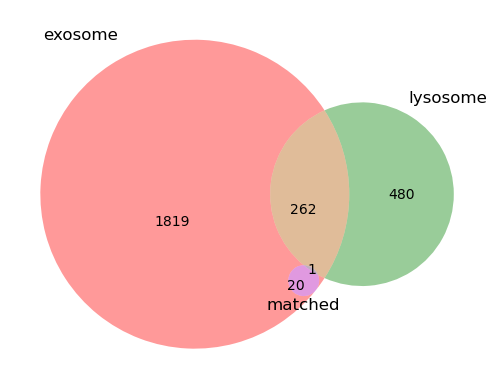

In [17]:
#test for overlap between exosome and lysosome annotation
df1 = pd.read_excel('test_exosome.xlsx')
df2 = pd.read_excel('Uniprot/ENDOMEMBRANE SYSTEM/lysosome.xlsx')
df3 = pd.read_excel('Output data/Extracellular proteins/matches_exosome.xlsx')

set1 = set(df1['Entry'])
set2 = set(df2['Entry'])
set3 = set(df3['Entry'])
    
venn3([set1, set2, set3], ('exosome', 'lysosome', 'matched'))
fig= plt.gcf()
plt.show()
